# ロジット・プロビット分析入門 (Python編)
## (Python編)

## 金融財務研究会　

## 2021/5/24(月)午前

## 講師：森谷博之　Quasars22 Private Limited


### 内容

- 一部 はじめに

    - Jupyter notebookのインストール
    - 記述統計
    - 推測統計の基礎：母数と標本
    - 離散選択問題入門：
        - オッズとオッズ比
        - ロジット、プロビット変換
        - 尤度と対数尤度
        - 

- 二部　離散選択問題入門

    - データセット
        - Spector and Mazzeo (1980)
        - アメリカ選挙調査
        - Rand研究所医療保険実験
        - 
        - 
    - 模型
        - 線形回帰
        - ロジット
        - プロビット
        - 多項ロジットモデル
        - ポアソン分布
        - 負の二項分布
        - 
        - 
    
### 参考文献：

- データ解析のために統計モデリング入門
- 離散選択問題オーバービュー(statsmodelsサンプルリファレンス)
- Generalized Linear Models AUnified Approach second edition Jeff Gill and Michelle Torres
-
- 
- 
- 


# 一部 はじめに

# Jupyter Notebookのインストール

[Qiita: jupyter notebookのインストール](https://qiita.com/innovation1005/items/2f433d6d859f075033a7)
を参考にしてください。

# 記述統計

得られたデータを用途に見合ったように加工して、要約して内容を伝える方法です。

- グラフによる可視化
- 要約統計量による記述
- 回帰分析によるでーたのあてはめ


# 推測統計の基礎：母数と標本

データ全体を母集団と呼び、その母集団から抽出されたデータを標本、またはサンプルと呼びます。この2つは明確に区別される必要があります。

- 母集団

母集団とは、調査対象となっているデータのもととなる集合のことです。母集団というときには２つのタイプに分類されます。定義により母集団が確定している場合と、ある特定のモデルを前提としている場合です。

- 標本

実際に手に入れることのできたデータのことです。観測値、実現値ともいいます。

例: 身近な事例(調査・研究)に関する母集団と標本となる統計データ

||||
|:-:         |:-:   |:-:    |
|調査・研究	|母集団|	標本|
|選挙の当選予測|	全有効票数|	出口調査で得られた票数|
|製品満足度調査|	製品を購入したすべてのお客様|	アンケートに答えた一部のお客様|
|品質管理	|製造したすべての商品	|検査対処となった一部の商品|
|株価の予測	|株価の予測モデル	|入手可能な過去の株価|

母集団は調査対象すべてです。標本は、その母集団から抽出された個体の集合で、母集団の部分集合です。私たちは母集団について知りたいと思っています。目的により、母集団が小さく限定されいる場合があります。そのようなときには、限定された集団の特徴を正確に伝えるように情報を要約する必要があります。母集団を得ることのできない場合があります。母集団について知りたいのですが、実際に知ることができるのは標本についてであって母集団についてではありません。したがって、推測統計では、部分集合である標本から集合全体の母集団を推測します。このときに統計的模型を使います。もっとも簡単な模型は確率分布です。また、線形回帰モデルも模型の１つです。母集団(確率分布、模型)を特徴づける定数を母数(パラメータ)といいます。母平均、母分散は母数です。一方、標本に適用した統計的な関数を統計量といいます。標本平均、標本分散は統計量です。

- 大数の法則と中心極限定理

標本の大きさが大きくなるとそれにともない、標本から得られる統計量は真の統計量(母数)に近づいていきます。たとえば、母集団が平均をもつときに、標本の大きさを大きくしていくと、標本の平均は、母集団のもつ平均(母平均)、または真の平均に近づいていきます。これを大数の法則といいます。

真の平均と標本の平均の誤差は標本の大きさを大きくすれば正規分布に近づいていきます。これを中心極限定理といいます。

- 推測統計の道具
    - 点推定
    - 区間推定
    - 統計的仮説検定
    - 線形回帰分析
    - 分散分析
    - 一般化線形回帰  
    など

# 離散選択問題入門

買う買わない、良い悪い、好き嫌いなど人々の行動は必ずしも連続であるとは限りません。また、科学的な現象においても病が直る直らない、花が咲く咲かないなど２値であったりと一般的な線形回帰の方法だけでは不十分です。単回帰模型

$Y_i=α+βx_i+ϵ_i$

の被説明変数が 1 か 0 の2値しか取らないとすると、通常の回帰模型は使えません。このような模型を非線形であるといいます。非線形というと二次関数や正弦関数を思い浮かべますが、階段状の関数も非線形です。そこで

$Y_i^*=α+βx_i+ϵ_i$

とします。$Y_i^*$ は連続的な観測不可能な潜在変数です。

- 例：コンビニエンスストアでアイスクリームを買う行動を分析してみましょう。

コンビニに近づくとアイスクリームを食べたくなる衝動が強くなり、つい買ってしまうひともいれば、コンビニの前でアイスクリームを食べているひとを見てつい買ってしまうひと、気温に左右されて買ってしまうひととか、その経済行動の背後にある理由はさまざまです。そのような現象を潜在変数として扱います。実際に観測されるのは

$Y_i=1 (Y_i^*>0"のとき" )アイスを購入する$

$Y_i=0 (Y_i^*≤0"のとき" )アイスを買わない$

とします。１段の階段状の関数を思い浮かべてみてください。$Y_i^*=α+βx_i+ϵ_i$を２値選択模型といいます。$Y_i=1$の確率 $P(Y_i=1)$は$P(Y_i^*>0)$と等価です。これは

$P(Y_i^*>0)=P(α+βx_i+ϵ_i>0)$

となります。これをさらに変換して

$P(α+βx_i+ϵ_i>0)=P(ϵ_i>-α-βx_i )$

を得ます。残差項$ϵ_i$の分布関数(累積分布関数)を考えます。累積分布関数で考えていますので、$ϵ_i$が大きくなるにつれて１に近づきます。つぎに、$ϵ_i$が決まると$x_i$も決まります。$ϵ_i$が標準正規分布にしたがうとすると左右対称なので、

$P(Y_i=1|x_i)=1-F(-α-βx_i )=F(α+βx_i )=F(z_i)$

となります。ここで$z_i=α+βx_i$ 選択確率が正規分布によって表されるときプロビット模型といいます。

では実際にトイモデルで確認してみましょう。$x$を気温とします。人々は気温が20度を超えるとアイスクリームを買います。それ以外ではアイスクリームを買いません。したがって、

$Y_i^*=-20+x_i+ϵ_i$

となります。$ϵ_i$は正規分布にしたがいます。$x_i=20$のとき、$Y_i^*=ϵ_i$になります。乱数の大きさに購買行動は左右されます。

$P(Y_i=1|x_i)=1-F(20-20 )=0.5$

ですので、気温が40度とすると

$P(Y_i=1|x_i)=1-F(20-40 )=1$

になり、確率にアイスクリームを買ってしまいます。

### 離散選択モデル
人びとの選択行動、意思決定の過程はつぎのようにモデル化されます。

- 意思決定者: 個人、家計、組織、企業など
- 応答変数(選択肢)：意思決定の対象となる買う・買わない、行く・行かない、徒歩・自転車・バス・鉄道などの離散的な選択
- 説明変数：選択に影響を及ぼす因子
- 意思決定規則：意思決定を行うメカニズム

#### アイスクリームの例

- 意思決定者: 個人
- 応答変数(選択肢)：コンビニエンスストアでのアイスクリームの購入
- 説明変数：コンビニまでの距離、コンビニの前にいるひとの行動、気温
- 意思決定規則：

$Y_i=1 (Y_i^*>0"のとき" )アイスを購入する$

$Y_i=0 (Y_i^*≤0"のとき" )アイスを買わない$

#### 確率の利用

ひとびとの選択行動をモデル化するときに、その選択肢を被説明変数として、行動を起こす要因を説明変数とするのではなく、選択肢を潜在変数をとおして確率に変換します。

- プロビット変換: 選択肢を各選択肢が生起する確率に変換する際に正規分布を用います。

$P(y_i=1)=F(z_i)=\int_{-\infty}^{z_i} \frac{1}{\sqrt{2\pi}}e^{-z^2/2}$

- ロジット変換：選択肢を各選択肢が生起する確率に変換する際にロジスティック分布を使います。

$P(y_i=1)=F(z_i)=\frac{1}{1+\exp(-z_i)}$

- オッズ：選択確率と非選択確率の比、選択確率/非選択確率
選択確率を

$p_i=P(y_i=1)=\frac{1}{1+\exp(-z_i)}$

とすると非選択確率は

$(1-p_i)=\frac{1}{1+\exp(z_i)}$

となるのでその比は

$p_i/(1-p_i)=z_i$

で与えられます。

- オッズ比：オッズの比のこと。

オッズ比=(ｘのオッズ)/(非xのオッズ)

#### 尤度関数

$y_i$が(1,0)の二値で対で得られたデータ$(y_i,x_i)$の尤度関数は

$$L({\beta_j})=\Pi_{y_i=1} p_i\Pi_{y_i=0}(1-p_i)=\Pi p_i^{y_i}(1-p_i)^{1-y_i}=\Pi z_i^{y_i}(1-z_i)^{1-y_i}$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import pandas as pd

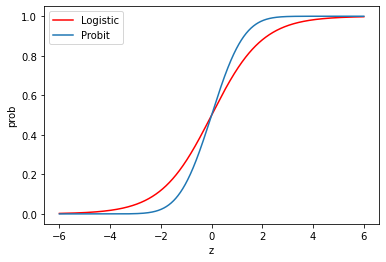

In [2]:
#ロジスティック分布と正規分布の累積分布関数の比較：ロジスティック分布の方がすそ野が厚い。
# stats.logistic.cdf：ロジスティック分布
# cdfは累積分布関数
# norm.cdf:正規分布
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
plt.xlabel('z')
plt.ylabel('prob')
ax.legend();

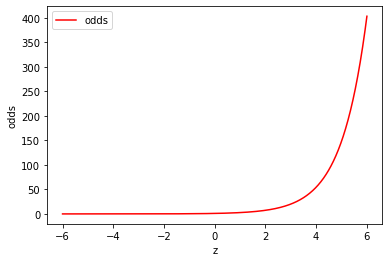

In [3]:
# オッズのグラフ：ｚが大きくなると急激に上昇します。
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support)/(1-stats.logistic.cdf(support)), 'r-', label='odds')
plt.xlabel('z')
plt.ylabel('odds')
ax.legend();

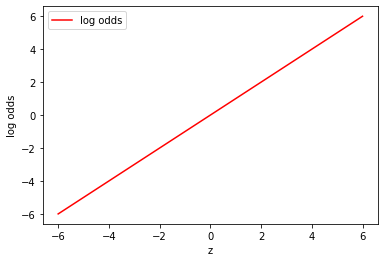

In [4]:
# オッズの対数のグラフ：対数を取ることで直線になります。あてはめがしやすくなります。
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, np.log(stats.logistic.cdf(support)/(1-stats.logistic.cdf(support))), 'r-', label='log odds')
plt.xlabel('z')
plt.ylabel('log odds')
ax.legend();

# 離散選択問題

- データ・セット
    - Spector and Mazzeo (1980)
        - 回帰直線
        - ロジット分析(sm.Logit)
        - プロビット分析(sm.Probit)
    - National Election Studies
        - 多項ロジット分析(sm.MNLogit)
    - Rand医療保険実験        
        - ポアソン分析(sm.Poisson)
        - 負の二項分布(sm.NegativeBinomial)
    


# 例１． [Spector and Mazzeo (1980)](https://www.statsmodels.org/stable/datasets/generated/spector.html) - 個人向け教育プログラム(PSI)の効果

個人向け教育プログラムによる効果の実データ：プログラムへの参加は生徒の評価の向上につながるのでしょうか？

データの詳細：32行、4列

|変数名|説明|
|:-:|:-:|
|Grade | 生徒の評価点(GPA)が改善したかどうかの2値データ。１が改善。|
|TUCE| 経済のテストの評価点
|GPA| 生徒の評価点(GPA)の平均
|PSI|プログラムへの参加の可否

#### データを取得して、その特徴をつかむ

In [5]:
#データの取得
spector_data = sm.datasets.spector.load(as_pandas=False)
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

sm.datasets.spector.NOTE

In [6]:
print('応答変数',spector_data.endog[:5])
print('説明変数',spector_data.exog[:5,:])

応答変数 [0. 0. 0. 0. 1.]
説明変数 [[ 2.66 20.    0.    1.  ]
 [ 2.89 22.    0.    1.  ]
 [ 3.28 24.    0.    1.  ]
 [ 2.92 12.    0.    1.  ]
 [ 4.   21.    0.    1.  ]]


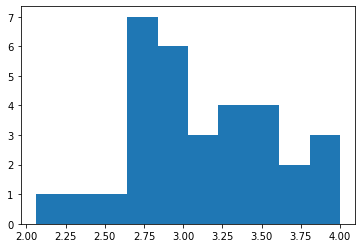

In [7]:
# 経済のテストの評価点
plt.hist(spector_data.exog[:,0])
plt.show()

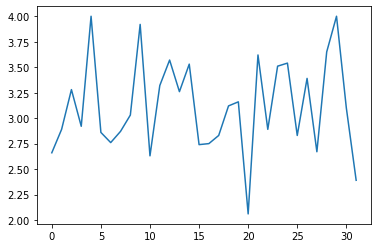

In [8]:
# 経済のテストの評価点
plt.plot(spector_data.exog[:,0])
plt.show()

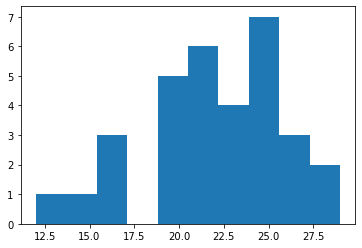

In [9]:
# 生徒の評価点(GPA)の平均
plt.hist(spector_data.exog[:,1])
plt.show()

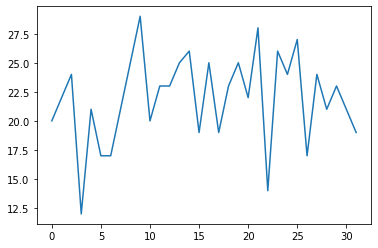

In [10]:
# 生徒の評価点(GPA)の平均
plt.plot(spector_data.exog[:,1])
plt.show()

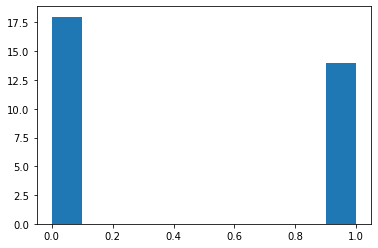

In [11]:
# プログラムへの参加の可否:プログラム参加１８
plt.hist(spector_data.exog[:,2])
plt.show()

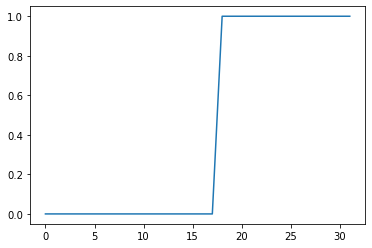

In [12]:
# プログラムへの参加の可否
plt.plot(spector_data.exog[:,2])

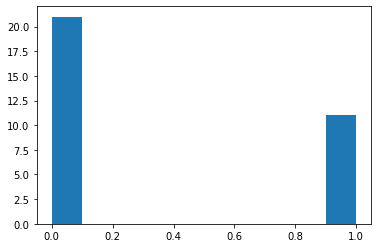

In [13]:
#　生徒の成績の改善：改善11
plt.hist(spector_data.endog)
plt.show()

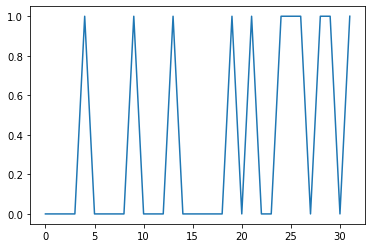

In [14]:
plt.plot(spector_data.endog)
plt.show()

##### 回帰直線による近似

In [15]:
ols_mod = sm.OLS(spector_data.endog, spector_data.exog)# 最小二乗法による線形回帰の設定
ols_res = ols_mod.fit()# 最適
ols_res.summary() # サマリーレポートの出力

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Mon, 24 May 2021   Prob (F-statistic):            0.00157
Time:                        01:25:52   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.008       0.132       0.796
x2             0.0105      0.019      0.539      0.594      -0.029       0.050
x3             0.3786      0.139      2.720      0.011       0.093       0.664
const         -1.4980      0.524     -2.859      0.008      -2.571      -0.425
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.167
Skew:                           0.141   Prob(JB):                        0.920
Kurtosis:                       2.786   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

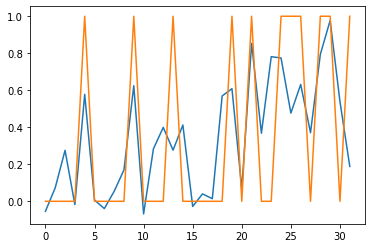

In [16]:
#予測値と実データの比較
plt.plot(ols_res.predict())# 予測の設定と可視化
plt.plot(spector_data.endog)
plt.show()

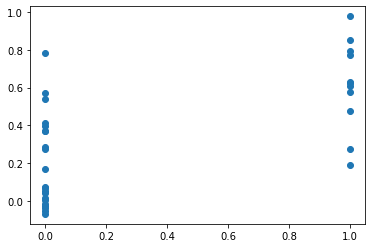

In [17]:
# 散布図による比較
plt.scatter(spector_data.endog,(ols_res.predict()))
plt.show()

##### ロジットモデルによる近似

In [18]:
logit_mod = sm.Logit(spector_data.endog, spector_data.exog)#ロジットモデルの設定
logit_res = logit_mod.fit(disp=0)#最適化
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.3740
Time:                        01:25:52   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001502
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8261      1.263      2.238      0.025       0.351       5.301
x2             0.0952      0.142      0.672      0.501      -0.182       0.373
x3             2.3787      1.065      2.234      0.025       0.292       4.465
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
==============================================================================
"""

サマリーレポート(logit_res.summary())の右側上部
- Pseudo R-squ: 線形回帰モデルの$r^2$に相当。McFaddenの$R^2$=1-モデルの尤度/ナル尤度
- Log-Likelihood:対数尤度
- LL-Null: ナルモデルの尤度、ナルモデルは切片以外の回帰係数はゼロ
- LLRp-value:　尤度比の統計量よりも大きいカイ二乗確率、線形回帰モデルのF検定に相当

In [19]:
# 限界効用分析：説明変数１単位が応答変数に与える影響
margeff = logit_res.get_margeff()#限界効用分析の設定
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3626      0.109      3.313      0.001       0.148       0.577
x2             0.0122      0.018      0.686      0.493      -0.023       0.047
x3             0.3052      0.092      3.304      0.001       0.124       0.486
==============================================================================
"""

In [20]:
# 限界効用分析：説明変数１単位が応答変数に与える影響
logit_res.get_margeff().summary()# 限界効用分析の出力

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3626      0.109      3.313      0.001       0.148       0.577
x2             0.0122      0.018      0.686      0.493      -0.023       0.047
x3             0.3052      0.092      3.304      0.001       0.124       0.486
==============================================================================
"""

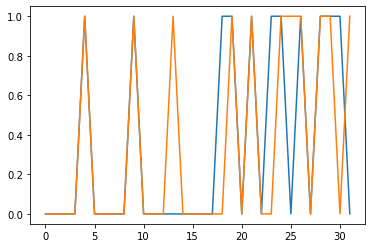

In [21]:
plt.plot(np.round(logit_res.predict()))
plt.plot(spector_data.endog)

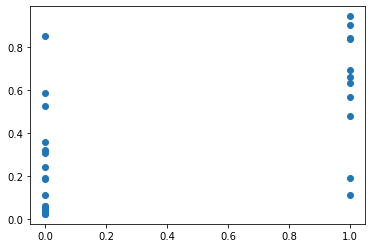

In [22]:
plt.scatter(spector_data.endog,(logit_res.predict()))

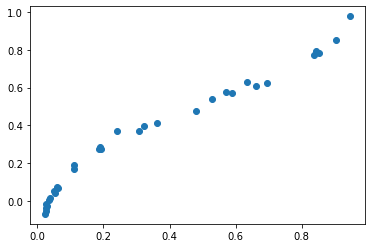

In [23]:
#ロジット分析と最小二乗近似の結果の比較
plt.scatter(logit_res.predict(),ols_res.predict())

##### プロビットモデルによる近似

In [24]:
probit_mod = sm.Probit(spector_data.endog, spector_data.exog)
probit_res = probit_mod.fit(disp=0)
probit_res.summary(),probit_res.get_margeff().summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                           Probit Regression Results                           
 Dep. Variable:                      y   No. Observations:                   32
 Model:                         Probit   Df Residuals:                       28
 Method:                           MLE   Df Model:                            3
 Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.3775
 Time:                        01:25:52   Log-Likelihood:                -12.819
 converged:                       True   LL-Null:                       -20.592
 Covariance Type:            nonrobust   LLR p-value:                  0.001405
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1             1.6258      0.694      2.343      0.019       0.266       2.986
 x2             0.0517      0.084      0.617      0.537      -0.113   

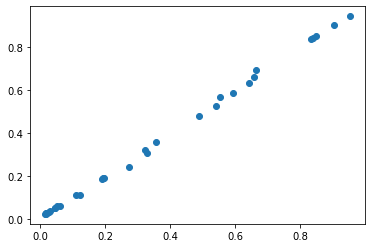

In [25]:
plt.scatter(probit_res.predict(),logit_res.predict())

In [26]:
# AICの比較
# AIC 最小のモデルはプロビット
ols_res.aic,logit_res.aic,probit_res.aic

(33.95649234217083, 33.77926844426283, 33.637608137778884)

# 例２：[アメリカ選挙調査](http://www.electionstudies.org/)

ANES(American National Election Study)のデータ

データの詳細：944行10列 実際に見るのは５つの項目に絞られています。

|変数名|説明||
|:-:|:-:|:-:|
|PID|政党指数|0:強民主党;1:弱民主党;2:独立-民主党;3:独立-独立;4:独立-共和党;5:弱共和党;6:強共和党|
|logpopul|国税調査の場所の人口の対数+0.1|
|educ|学歴|1:1~8グレード;2:高校中退;3:高校卒;4:大学中退;5:学士;6:修士;7:博士|
|age|年齢||
|vote|予定投票|1:強リベラル;2:リベラル;3:弱リベラル;4:中道;5:弱保守;6:保守;7:強保守|
|income|収入|1:<2999;2:<4999:;3:<6999;4:<8999;5:<9999;6:<10999;7:<11999;8:<12999;|
|||9:<13999;10:<14999;11:<16999;12:<19999;13:<21999;14:<24999:15:<29999;16:<34999;|
|||17:<39999;18:<44999;19:<49999;20:<59999;21:<74999;22:<89999;23<104999;24:<over|


In [27]:
anes_data = sm.datasets.anes96.load(as_pandas=False)
anes_exog = anes_data.exog
anes_exog = sm.add_constant(anes_exog, prepend=False)

In [28]:
print(anes_data.endog[:5])
print(anes_data.exog[:5,:])

[6. 1. 1. 1. 0.]
[[-2.30258509  7.         36.          3.          1.        ]
 [ 5.24755025  3.         20.          4.          1.        ]
 [ 3.43720782  2.         24.          6.          1.        ]
 [ 4.4200447   3.         28.          6.          1.        ]
 [ 6.46162441  5.         68.          6.          1.        ]]


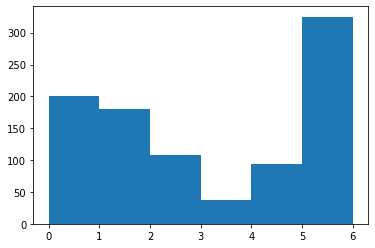

In [29]:
# 応答変数の性質
plt.hist(anes_data.endog,stacked=True,bins=[0,1,2,3,4,5,6])
plt.show()

In [30]:
mlogit_mod = sm.MNLogit(anes_data.endog, anes_exog)#多項ロジットモデルの設定
mlogit_res = mlogit_mod.fit()
mlogit_res.summary()

Optimization terminated successfully.
         Current function value: 1.548647
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  944
Model:                        MNLogit   Df Residuals:                      908
Method:                           MLE   Df Model:                           30
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.1648
Time:                        01:25:53   Log-Likelihood:                -1461.9
converged:                       True   LL-Null:                       -1750.3
Covariance Type:            nonrobust   LLR p-value:                1.822e-102
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0115      0.034     -0.336      0.736      -0.079       0.056
x2             0.2977      0.094      3.180      0.001       0.114       0.481
x3            -0.0249      0.007     -3.823      0.000      -0.038      -0.012
x4             0.0825      0.074      1.121      0.262      -0.062       0.227
x5             0.0052      0.018      0.295      0.768      -0.029       0.040
const         -0.3734      0.630     -0.593      0.553      -1.608       0.861
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0888      0.039     -2.266      0.023      -0.166      -0.012
x2             0.3917      0.108      3.619      0.000       0.180       0.604
x3            -0.0229      0.008     -2.893      0.004      -0.038      -0.007
x4             0.1810      0.085      2.123      0.034       0.014       0.348
x5             0.0479      0.022      2.149      0.032       0.004       0.092
const         -2.2509      0.763     -2.949      0.003      -3.747      -0.755
------------------------------------------------------------------------------
       y=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1060      0.057     -1.858      0.063      -0.218       0.006
x2             0.5735      0.159      3.617      0.000       0.263       0.884
x3            -0.0149      0.011     -1.311      0.190      -0.037       0.007
x4            -0.0072      0.126     -0.057      0.955      -0.255       0.240
x5             0.0576      0.034      1.713      0.087      -0.008       0.123
const         -3.6656      1.157     -3.169      0.002      -5.932      -1.399
------------------------------------------------------------------------------
       y=4       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0916      0.044     -2.091      0.037      -0.177      -0.006
x2             1.2788      0.129      9.921      0.000       1.026       1.531
x3            -0.0087      0.008     -1.031      0.302      -0.025       0.008
x4             0.1998      0.094      2.123      0.034       0.015       0.384
x5             0.0845      0.026      3.226      0.001       0.033       0.136
const         -7.6138      0.958     -7.951      0.000      -9.491      -5.737
------------------------------------------------------------------------------
       y=5       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0933      0.039     -2.371      0.018      -0.170      -0.016
x2             1.3470      0.117     11.494      0.000       1.117       1.577
x3

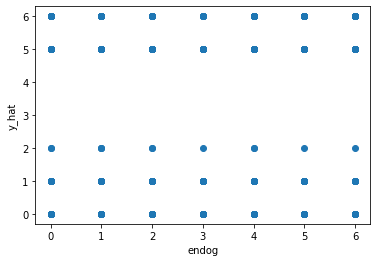

In [31]:
y_hat=np.argmax(mlogit_res.predict(),axis=1)
plt.scatter(anes_data.endog,y_hat)
plt.xlabel('endog')
plt.ylabel('y_hat')
plt.show()

# ランド医療保険実験


医療経済学の世界ではじめて行われたRCT(Randomized controlled trial)になります。これは

医療費の自己負担割合が受療行動にどのような影響を与えるのかを実証的に調べたのがランド医療保険実験です。1971～1986年に、アメリカの6市に住む2750世帯を対象に行われました。医療保険があると必要以上の多くの量の医療サービスを消費してしまうと思われがちです。自己負担割合を設定することでこのモラル・ハザードを抑制することができるかを研究した社会実験です。保険の還付などを行うために民間医療保険会社が設立されました。2750世帯の研究対象者は無料で医療保険をもらうことができたのですが、そのプランはランダムに設定された4つの自己負担割合からなります。3～5年のフォローアップ期間を設け、受療行動や健康の状態が評価されました。

自己負担ゼロプラン
自己負担25%プラン
自己負担50%プラン
自己負担95%プラン
HMOプラン（自己負担はゼロだが受診できる医療機関は制限される）
さらには、年間の自己負担上限（out-of-pocket maximum）が収入の5%、10%、15%と$1,000のいずれかより低い方に設定されており、上記の自己負担割合と組み合わせられ各プランが作られていました。

データの詳細：20,190行10列

|変数名|説明||
|:-:|:-:|:-:|
|mdvis|年間外来受診回数|
|lncoins|ln(共同負担+1)|0:<=共同負担<=100|
|idp|高額控除となる保険プラン|1:保険プラン;0:それ以外|
|lpi|年間控除額|ln(max(1, annual participation incentive payment))|
|fmde|保険プランの共同負担額|0: idp=1の場合; 共同負担それ以外|
|physlm|1: 身体的制約がある
|disea|持病の数|
|hlthg|1:自己申告の健康状態が良い|6
|hlthf|1:自己申告の健康状態が普通|7
|hlthp|1:自己申告の健康状態が悪い|8


ランドのデータを読み込みます。

In [32]:
rand_data = sm.datasets.randhie.load(as_pandas=False)
rand_exog = rand_data.exog.view(float).reshape(len(rand_data.exog), -1)

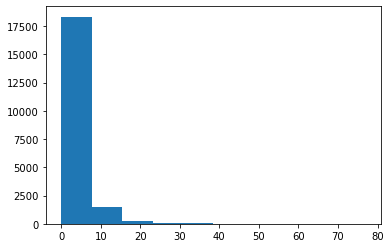

In [33]:
# 年間外来受診回数
plt.hist(rand_data.endog)
plt.show()

In [34]:
rand_exog[:5]

array([[ 4.61512 ,  1.      ,  6.907755,  0.      ,  0.      , 13.73189 ,
         1.      ,  0.      ,  0.      ],
       [ 4.61512 ,  1.      ,  6.907755,  0.      ,  0.      , 13.73189 ,
         1.      ,  0.      ,  0.      ],
       [ 4.61512 ,  1.      ,  6.907755,  0.      ,  0.      , 13.73189 ,
         1.      ,  0.      ,  0.      ],
       [ 4.61512 ,  1.      ,  6.907755,  0.      ,  0.      , 13.73189 ,
         1.      ,  0.      ,  0.      ],
       [ 4.61512 ,  1.      ,  6.907755,  0.      ,  0.      , 13.73189 ,
         1.      ,  0.      ,  0.      ]])

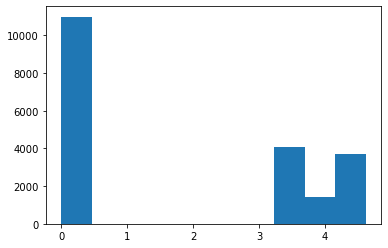

0.000000    10997
3.258096     4065
3.931826     1401
4.564348     2653
4.615120     1074
Name: 0, dtype: int64

In [35]:
# 共同負担
plt.hist(rand_exog[:,0])
plt.show()
x=pd.DataFrame(rand_exog)
x.iloc[:,0].value_counts().sort_index()

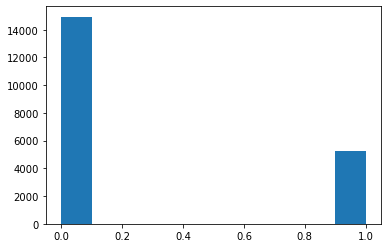

In [36]:
# 高額控除となる保険プラン
plt.hist(rand_exog[:,1])
plt.show()

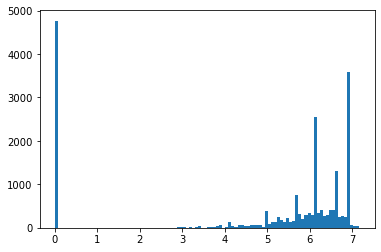

0.000000    4767
2.484907       5
2.821379       4
2.890372      24
2.960105      14
            ... 
7.067320      22
7.080969      15
7.122189      16
7.128143      21
7.163699      15
Name: 2, Length: 619, dtype: int64

In [37]:
# 年間控除額
plt.hist(rand_exog[:,2],bins=100)
plt.show()
x=pd.DataFrame(rand_exog)
x.iloc[:,2].value_counts().sort_index()

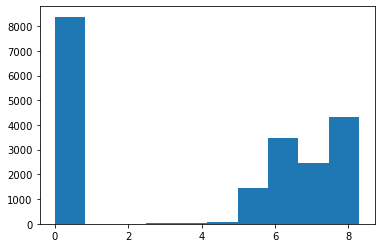

0.000000    8379
2.941665       6
3.011398      14
3.592253       4
3.628682       3
            ... 
8.242756       5
8.248006       6
8.257385      21
8.259924      23
8.294049    1005
Name: 3, Length: 345, dtype: int64

In [38]:
# 保険プランの共同負担
plt.hist(rand_exog[:,3])
plt.show()
x=pd.DataFrame(rand_exog)
x.iloc[:,3].value_counts().sort_index()

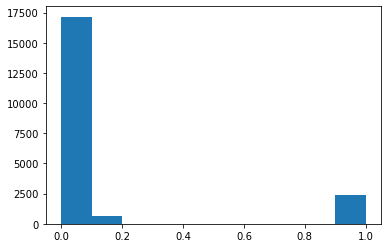

0.000000    16751
0.022124      134
0.026846      128
0.027778        5
0.032787      129
0.043127        9
0.129820       15
0.144292      537
0.157250       72
0.198187       23
1.000000     2387
Name: 4, dtype: int64

In [39]:
#  身体的制約
plt.hist(rand_exog[:,4])
plt.show()
x=pd.DataFrame(rand_exog)
x.iloc[:,4].value_counts().sort_index()

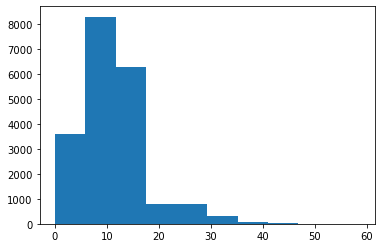

0.000000     1307
3.400000     1980
4.300000      292
6.900000     1889
8.700000      384
9.967326     1986
10.300000    1654
10.576260    2375
11.842670    1251
13.000000     361
13.731890    2389
13.800000    1122
17.200000     833
17.400000     309
20.700000     574
21.700000     214
24.100000     410
26.100000     126
27.600000     269
30.400000      96
31.000000     126
34.500000      74
34.800000      28
37.900000      74
39.100000      12
41.400000      21
43.500000      13
44.800000       9
47.800000       4
48.300000       3
58.600000       5
Name: 5, dtype: int64

In [40]:
# 持病の数
plt.hist(rand_exog[:,5])
plt.show()
x=pd.DataFrame(rand_exog)
(x.iloc[:,5].value_counts()).sort_index()

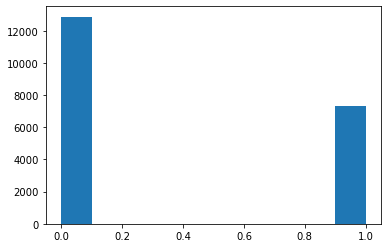

In [41]:
# 自己申告の健康状態が良い
plt.hist(rand_exog[:,6])
plt.show()

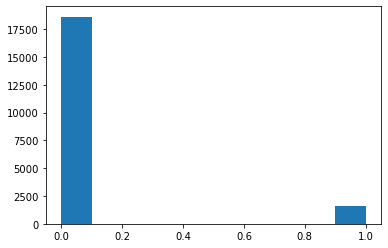

In [42]:
# 自己申告の健康状態が普通
plt.hist(rand_exog[:,7])
plt.show()

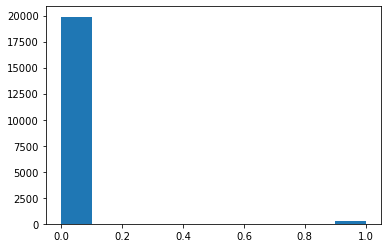

In [43]:
# 自己申告の健康状態が悪い
plt.hist(rand_exog[:,8])
plt.show()

In [44]:
# ランド医療保険実験のポアソンモデルによる分析
rand_exog = sm.add_constant(rand_exog, prepend=False)
poisson_mod = sm.Poisson(rand_data.endog, rand_exog)
poisson_res = poisson_mod.fit(method="newton")
poisson_res.summary(),poisson_res.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 3.091609
         Iterations 6


(<class 'statsmodels.iolib.summary.Summary'>
 """
                           Poisson Regression Results                          
 Dep. Variable:                      y   No. Observations:                20190
 Model:                        Poisson   Df Residuals:                    20180
 Method:                           MLE   Df Model:                            9
 Date:                Mon, 24 May 2021   Pseudo R-squ.:                 0.06343
 Time:                        01:25:55   Log-Likelihood:                -62420.
 converged:                       True   LL-Null:                       -66647.
 Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1            -0.0525      0.003    -18.216      0.000      -0.058      -0.047
 x2            -0.2471      0.011    -23.272      0.000      -0.268   

In [45]:
# ランド医療保険実験の負の二項分布モデルによる分析
mod_nbin = sm.NegativeBinomial(rand_data.endog, rand_exog)
#res_nbin = mod_nbin.fit(disp=False)
res_nbin = mod_nbin.fit(method='bfgs', maxiter=250)
res_nbin.summary(),res_nbin.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 2.148770
         Iterations: 37
         Function evaluations: 41
         Gradient evaluations: 41


(<class 'statsmodels.iolib.summary.Summary'>
 """
                      NegativeBinomial Regression Results                      
 Dep. Variable:                      y   No. Observations:                20190
 Model:               NegativeBinomial   Df Residuals:                    20180
 Method:                           MLE   Df Model:                            9
 Date:                Mon, 24 May 2021   Pseudo R-squ.:                 0.01845
 Time:                        01:25:55   Log-Likelihood:                -43384.
 converged:                       True   LL-Null:                       -44199.
 Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1            -0.0579      0.006     -9.516      0.000      -0.070      -0.046
 x2            -0.2678      0.023    -11.801      0.000      -0.312   

In [46]:
res_nbin.predict()

array([2.44218197, 2.44218197, 2.44218197, ..., 2.44767374, 2.41125729,
       2.42211463])

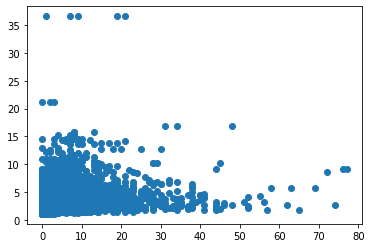

In [47]:
y_hat=res_nbin.predict()
plt.scatter(rand_data.endog,y_hat)

# ワインデータの分析

ポルトガルのミーニョ地方（北西部）ヴィーニョ・ヴェルデのアルコール度数中程度の赤ワインの評価と物理化学的検査の結果です。データは2004年5月から2007年2月にかけて収集され公式認証機関（CVRVV）で検査されました。CVRVVは、ヴィーニョ・ヴェルデの品質とマーケティングを向上させることを目的とした専門組織です。ワインのサンプル検査はプロセスを自動的に管理するコンピュータシステムによって記録されました。また、評価については，各サンプルを最低3人の専門家が評価しています。評価は，0（非常に悪い）から10（素晴らしい）までのブラインドテイスティングの結果です。これからこのデータベースを活用して、データ分析の手法を学んでいきます。

データの読み込み

In [48]:
import pandas as pd
wb='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wdata=pd.read_csv(wb,sep=";",header=0)  
wdata_endog=wdata.quality
wdata_exog=wdata.iloc[:,:-1]

X = sm.add_constant(wdata_exog)
model = sm.OLS(wdata_endog, X)
wols_res=model.fit()
wols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 24 May 2021   Prob (F-statistic):          1.79e-145
Time:                        01:25:57   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

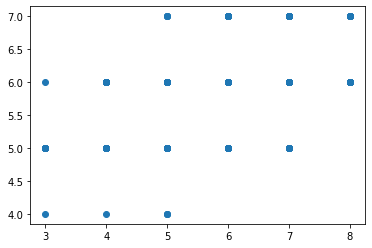

In [49]:
plt.scatter(wdata_endog,np.round(wols_res.predict()))

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(np.round(wols_res.predict()), wdata_endog, normalize=True)

0.5916197623514696

In [51]:
X=wdata_exog.iloc[:,1:]
X=X.drop(columns=['citric acid','residual sugar','density'])
X = sm.add_constant(X)

model = sm.OLS(wdata_endog, X)
wols_res2=model.fit()
wols_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 24 May 2021   Prob (F-statistic):          5.32e-149
Time:                        01:25:57   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301      0.403     10.995      0.000       3.640       5.220
volatile acidity        -1.0128      0.101    -10.043      0.000      -1.211      -0.815
chlorides               -2.0178      0.398     -5.076      0.000      -2.798      -1.238
free sulfur dioxide      0.0051      0.002      2.389      0.017       0.001       0.009
total sulfur dioxide    -0.0035      0.001     -5.070      0.000      -0.005      -0.002
pH                      -0.4827      0.118     -4.106      0.000      -0.713      -0.252
sulphates                0.8827      0.110      8.031      0.000       0.667       1.098
alcohol                  0.2893      0.017     17.225      0.000       0.256       0.322
==============================================================================
Omnibus:                       24.204   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.245
Skew:                          -0.156   Prob(JB):                     2.22e-08
Kurtosis:                       3.657   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
accuracy_score(np.round(wols_res2.predict()), wdata_endog, normalize=True)

0.5928705440900562

In [53]:
wols_res2.params*wols_res2.bse#/np.sqrt(np.var(data_endog))

const                   1.784961
volatile acidity       -0.102129
chlorides              -0.802165
free sulfur dioxide     0.000011
total sulfur dioxide   -0.000002
pH                     -0.056741
sulphates               0.097012
alcohol                 0.004859
dtype: float64

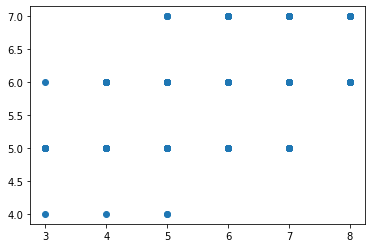

In [54]:
plt.scatter(wdata_endog,np.round(wols_res2.predict()))

In [55]:
wols_res.aic,wols_res2.aic

(3162.276552582634, 3156.9768801278606)

In [56]:
# 多項ロジットモデル
wmnl_mod = sm.MNLogit(wdata_endog, X)
wmnl_res=wmnl_mod.fit()
wmnl_res.summary()

Optimization terminated successfully.
         Current function value: 0.926087
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                quality   No. Observations:                 1599
Model:                        MNLogit   Df Residuals:                     1559
Method:                           MLE   Df Model:                           35
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.2182
Time:                        01:25:58   Log-Likelihood:                -1480.8
converged:                       True   LL-Null:                       -1894.2
Covariance Type:            nonrobust   LLR p-value:                5.160e-151
========================================================================================
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.0970     10.403     -0.298      0.766     -23.487      17.293
volatile acidity        -4.1730      2.008     -2.078      0.038      -8.108      -0.238
chlorides               -8.5643      6.446     -1.329      0.184     -21.197       4.069
free sulfur dioxide     -0.1349      0.078     -1.737      0.082      -0.287       0.017
total sulfur dioxide     0.0711      0.043      1.670      0.095      -0.012       0.155
pH                      -1.6204      3.304     -0.491      0.624      -8.095       4.854
sulphates                0.0092      3.211      0.003      0.998      -6.284       6.303
alcohol                  1.3849      0.727      1.904      0.057      -0.040       2.810
----------------------------------------------------------------------------------------
           quality=5       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.6720     10.000      0.967      0.333      -9.928      29.272
volatile acidity        -6.9459      1.971     -3.525      0.000     -10.808      -3.083
chlorides              -11.0004      5.740     -1.917      0.055     -22.250       0.249
free sulfur dioxide     -0.1172      0.074     -1.578      0.115      -0.263       0.028
total sulfur dioxide     0.0855      0.042      2.035      0.042       0.003       0.168
pH                      -3.3854      3.176     -1.066      0.286      -9.609       2.839
sulphates                0.2240      2.989      0.075      0.940      -5.634       6.082
alcohol                  1.0479      0.711      1.474      0.141      -0.346       2.442
----------------------------------------------------------------------------------------
           quality=6       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9897     10.034      0.298      0.766     -16.676      22.656
volatile acidity        -8.9758      1.990     -4.511      0.000     -12.876      -5.076
chlorides              -14.7173      5.831     -2.524      0.012     -26.147      -3.288
free sulfur dioxide     -0.0917      0.074     -1.233      0.218      -0.237       0.054
total sulfur dioxide     0.0675      0.042      1.604      0.109      -0.015       0.150
pH                      -3.7125      3.185     -1.166      0.244      -9.955       2.530
sulphates                2.4896      2.998      0.831      0.406      -3.385       8.365
alcohol                  1.8404      0.712      2.585      0.010       0.445       3.236
----------------------------------------------------------------------------------------
           quality=7       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3882     1

In [57]:
y_hat=np.argmax(wmnl_res.predict(),axis=1)+3
accuracy_score(y_hat, wdata_endog, normalize=True)

0.6028767979987493

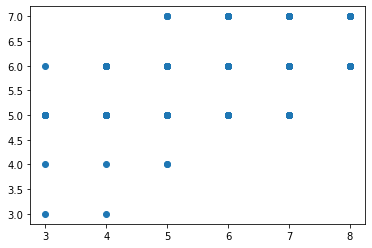

In [58]:
plt.scatter(wdata_endog,y_hat)

In [59]:
# ポアソンモデル
wpoi_mod = sm.Poisson(wdata_endog, X)
wpoi_res=wpoi_mod.fit()
wpoi_res.summary()

Optimization terminated successfully.
         Current function value: 1.830709
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                quality   No. Observations:                 1599
Model:                        Poisson   Df Residuals:                     1591
Method:                           MLE   Df Model:                            7
Date:                Mon, 24 May 2021   Pseudo R-squ.:                 0.01112
Time:                        01:25:58   Log-Likelihood:                -2927.3
converged:                       True   LL-Null:                       -2960.2
Covariance Type:            nonrobust   LLR p-value:                 1.013e-11
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5212      0.260      5.840      0.000       1.011       2.032
volatile acidity        -0.1826      0.066     -2.749      0.006      -0.313      -0.052
chlorides               -0.3581      0.263     -1.362      0.173      -0.874       0.157
free sulfur dioxide      0.0009      0.001      0.683      0.494      -0.002       0.004
total sulfur dioxide    -0.0006      0.000     -1.429      0.153      -0.002       0.000
pH                      -0.0817      0.076     -1.073      0.283      -0.231       0.068
sulphates                0.1544      0.070      2.211      0.027       0.018       0.291
alcohol                  0.0495      0.011      4.647      0.000       0.029       0.070
========================================================================================
"""

In [60]:
y_hat=np.round(wpoi_res.predict())
accuracy_score(y_hat, wdata_endog, normalize=True)

0.5978736710444027

In [61]:
# ２タイプの最小二乗法によるAICの比較
wols_res.aic,wols_res2.aic

(3162.276552582634, 3156.9768801278606)

In [62]:
# 多項ロジットとポアソンのAICの比較
wmnl_res.aic,wpoi_res.aic

(3041.6262818012788, 5870.608896102845)